# *Assignment 2: UNSTRUCTURED DATA FOR MARKETING ANALYTICS*


Key issues to address
- [ ] Emojis (I don't like the function 'extract_emojis'
- [ ] Try out some different models?

# PART 1

## Data Preparation

In [1]:
!pip install pandas
!pip install textblob
!pip install google

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter

In [ ]:
url = 'https://dl.dropboxusercontent.com/scl/fi/srn10j6zh6rpkg9n0e949/BBS_CMA_Assignment2_Final_Data.xlsx?rlkey=syav20c7yexn1ers6skbw20bb&dl=1'
tweets_data = pd.read_excel(url)
print(tweets_data.head())


   id          created_at                                               text  \
0   1 2020-01-01 00:10:14  The #TueYearsEve $20 gift card giveaway is off...   
1   2 2019-12-31 21:00:04  If you could have 2020 of something, it would be:   
2   3 2019-12-31 20:00:00  New year, new you, new $20 gift card🤑 \nReply ...   
3   4 2019-12-31 18:00:00  Start the new year off on the right… vacation ...   
4   5 2019-12-31 11:00:00  New York drops the ball. We drop money 🤑\n\nKi...   

   likes  quotes  replies  retweets     brand  followers  following  
0    862      23      362       105  T-Mobile    1488892      12594  
1    517      15      269        92  T-Mobile    1488892      12594  
2   7502    2368    37780      3233  T-Mobile    1488892      12594  
3    508       6       39       101  T-Mobile    1488892      12594  
4   6838     218     1225      2129  T-Mobile    1488892      12594  


## Point 1

In [ ]:
# Function to calculate sentiment scores using TextBlob
def sentiment_scores(text):
    """
    Calculate sentiment polarity and subjectivity using TextBlob.
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

tweets_data['polarity'], tweets_data['subjectivity'] = zip(*tweets_data['text'].apply(sentiment_scores))

# Display the updated dataframe with sentiment scores
print(tweets_data.head())

   id          created_at                                               text  \
0   1 2020-01-01 00:10:14  The #TueYearsEve $20 gift card giveaway is off...   
1   2 2019-12-31 21:00:04  If you could have 2020 of something, it would be:   
2   3 2019-12-31 20:00:00  New year, new you, new $20 gift card🤑 \nReply ...   
3   4 2019-12-31 18:00:00  Start the new year off on the right… vacation ...   
4   5 2019-12-31 11:00:00  New York drops the ball. We drop money 🤑\n\nKi...   

   likes  quotes  replies  retweets     brand  followers  following  polarity  \
0    862      23      362       105  T-Mobile    1488892      12594  0.480000   
1    517      15      269        92  T-Mobile    1488892      12594  0.000000   
2   7502    2368    37780      3233  T-Mobile    1488892      12594  0.302273   
3    508       6       39       101  T-Mobile    1488892      12594  0.068182   
4   6838     218     1225      2129  T-Mobile    1488892      12594  0.312121   

   subjectivity  
0      0.47000

The results can be interpreted by analyzing the values in the columns, where higher values of subjectivity indicate more subjective text, and values of polarity closer to 1 indicate more positive sentiment, while values closer to -1 indicate more negative sentiment. In TextBlob library, the polarity score ranges from -1 to +1, where -1 means very negative sentiment, 0 means neutral sentiment, and +1 means very positive sentiment. Similarly, subjectivity score also ranges from 0 to 1, where 0 means the text is very objective or factual, and 1 means the text is very subjective or opinionated.

In [ ]:
# Group by brand and calculate the mean polarity and subjectivity
brand_sentiment = tweets_data.groupby('brand').agg({'polarity':'mean', 'subjectivity':'mean'}).reset_index()

# Display the sentiment scores grouped by brand
brand_sentiment

,brand,polarity,subjectivity
0,Coca-Cola,0.229149,0.396011
1,T-Mobile,0.258456,0.468700
2,Target,0.151291,0.388676
3,americanair,0.245873,0.402084


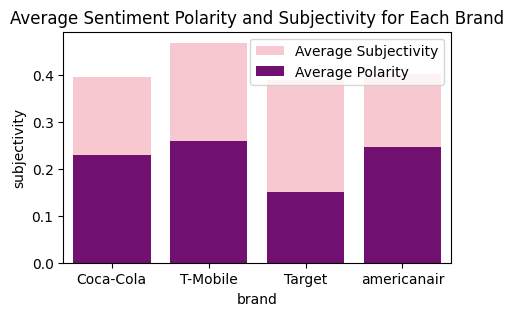

In [ ]:
# Now let's create a bar plot
plt.figure(figsize=(5, 3))
sns.barplot(x='brand', y='subjectivity', data=brand_sentiment, color='pink', label='Average Subjectivity')
sns.barplot(x='brand', y='polarity', data= brand_sentiment, color='purple', label='Average Polarity')
plt.title('Average Sentiment Polarity and Subjectivity for Each Brand')
plt.legend()
plt.show()

The visualizations above represent the average sentiment polarity and subjectivity for each brand (Coca-Cola, T-Mobile, target, and americanair) based on their Twitter communications.
- Average polarity shows how positive or negative the average sentiment of each brand's tweets is. A higher score indicates more positive sentiment, while a lower score indicates more negative sentiment.
- While average subjectivity illustrates the level of subjectivity in the tweets of each brand. A higher score indicates more subjective (opinionated or emotional) content, while a lower score suggests more objective (factual) content.

## Point 2

### EMOJIS

In [ ]:
import regex as re

# Define a function to extract emojis from a string
def extract_emojis(text):
    # Unicode ranges for emojis
    emoji_ranges = [
        '\U0001F300-\U0001F5FF',  # symbols & pictographs
        '\U0001F600-\U0001F64F',  # emoticons
        '\U0001F680-\U0001F6FF',  # transport & map symbols
        '\U0001F700-\U0001F77F',  # alchemical symbols
        '\U0001F780-\U0001F7FF',  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF',  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF',  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F',  # Chess Symbols
        '\U0001FA70-\U0001FAFF',  # Symbols and Pictographs Extended-A
        '\U00002702-\U000027B0',  # Dingbats
        '\U000024C2-\U0001F251',  # Enclosed characters
        '\U0001F1E0-\U0001F1FF',  # Flags (Regional Indicator Symbols)
        '\U0001F201-\U0001F2FF',  # Enclosed Alphanumeric Supplement
        '\U0001F300-\U0001F5FF',  # Miscellaneous Symbols and Pictographs
        '\U0001F600-\U0001F64F',  # Emoticons (Emojis)
        '\U0001F680-\U0001F6FF',  # Transport and Map Symbols
        '\U0001F700-\U0001F77F',  # Alchemical Symbols
        '\U0001F780-\U0001F7FF',  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF',  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF',  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F',  # Chess Symbols
        '\U0001FA70-\U0001FAFF',  # Symbols and Pictographs Extended-A
        '\U0001F910-\U0001F96B',  # Supplemental Symbols and Pictographs
        '\U0001F97A-\U0001F9A2',  # Supplemental Symbols and Pictographs
        '\U0001F9B0-\U0001F9E6',  # Supplemental Symbols and Pictographs
        '\U0001F9F0-\U0001F9FF',  # Supplemental Symbols and Pictographs
        '\U00002600-\U000026FF',  # Miscellaneous Symbols
        '\U00002700-\U000027BF',  # Dingbats
        '\U00002B50-\U00002BFF',  # Miscellaneous Symbols
        '\U0001F0CF',             # Playing card black joker
        '\U0001F18E',             # Negative squared AB
        '\U0001F191-\U0001F19A',  # Squared words
        '\U0001F1E6-\U0001F1FF',  # Flag symbols
        '\U0001F201-\U0001F21A',  # Enclosed characters with rounded square
        '\U0001F22F',             # Squared CJK letters and months
        '\U0001F232-\U0001F236',  # Squared words
        '\U0001F238-\U0001F23A',  # Squared words
        '\U0001F250-\U0001F251',  # Circled ideographs
        '\U0001F300-\U0001F320',  # Weather and astrological symbols
        '\U0001F32D-\U0001F335',  # Food and plants
        '\U0001F337-\U0001F37C',  # Food and plants


    ]

    emoji_pattern = '[' + ''.join(emoji_ranges) + ']'
    return re.findall(emoji_pattern, text)

# Apply the function to each tweet and count emojis
tweets_data['emojis'] = tweets_data['text'].apply(extract_emojis)
tweets_data['emoji_count'] = tweets_data['emojis'].apply(len)

# Group by brand and sum the emoji counts
emoji_counts_by_brand = tweets_data.groupby('brand')['emoji_count'].sum().reset_index()

# Display the emoji counts for each brand
emoji_counts_by_brand



,brand,emoji_count
0,Coca-Cola,401
1,T-Mobile,577
2,Target,555
3,americanair,354


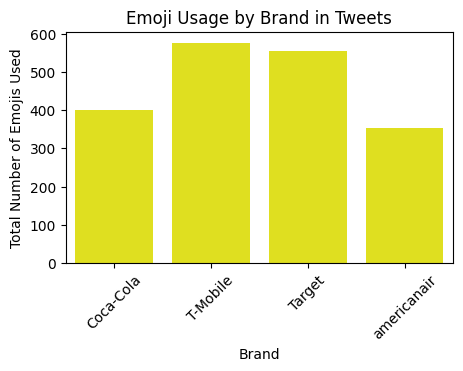

In [ ]:
# Creating a bar plot to visualize the emoji usage by each brand

plt.figure(figsize=(5, 3))
sns.barplot(x='brand', y='emoji_count', data=emoji_counts_by_brand, color = 'yellow')
plt.title('Emoji Usage by Brand in Tweets')
plt.xlabel('Brand')
plt.ylabel('Total Number of Emojis Used')
plt.xticks(rotation=45)
plt.show()


However, we are also interested in what types of emojis each brand uses

In [ ]:
# Aggregate the emojis for each brand
emoji_list_by_brand = tweets_data.groupby('brand')['emojis'].sum()

# Count the occurrences of each emoji for each brand
emoji_counts_detailed = {brand: Counter(emojis) for brand, emojis in emoji_list_by_brand.items()}

# Transforming the counts into a DataFrame for easier visualization
emoji_counts_df = pd.DataFrame.from_dict(emoji_counts_detailed, orient='index').fillna(0).T

# Display the top 5 emojis for each brand for a quick overview
top_emojis_per_brand = emoji_counts_df.apply(lambda x: x.nlargest(5)).T
top_emojis_per_brand.head()


,━,┃,█,✈,❤,,️,🍔,🏽,👇,👏,📲,📷,📸,🔥,🙌,🥺
Coca-Cola,NaN,NaN,NaN,NaN,25.0,NaN,68.0,NaN,NaN,17.0,13.0,NaN,NaN,NaN,NaN,11.0,NaN
T-Mobile,NaN,NaN,NaN,NaN,NaN,NaN,70.0,15.0,NaN,NaN,NaN,16.0,NaN,NaN,14.0,18.0,NaN
americanair,NaN,NaN,NaN,22.0,NaN,NaN,59.0,NaN,10.0,NaN,NaN,NaN,11.0,10.0,NaN,NaN,NaN
Target,27.0,20.0,20.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0


In [ ]:
# Creating a more detailed summary table for the most used emojis by each brand

# Finding the top emojis for each brand
top_emojis_summary = {}
for brand, counts in emoji_counts_detailed.items():
    # Get the top 5 most frequent emojis for each brand
    top_emojis = counts.most_common(5)
    # Add the emojis and their counts to the summary
    top_emojis_summary[brand] = {emoji: count for emoji, count in top_emojis}

# Convert the summary dictionary to a DataFrame for better visualization
top_emojis_summary_df = pd.DataFrame(top_emojis_summary).fillna(0)

# Display the summary table
top_emojis_summary_df


,Coca-Cola,T-Mobile,Target,americanair
️,68.0,70.0,0.0,59.0
❤,25.0,0.0,0.0,0.0
👇,17.0,0.0,0.0,0.0
👏,13.0,0.0,0.0,0.0
🙌,11.0,18.0,0.0,0.0
📲,0.0,16.0,0.0,0.0
🍔,0.0,15.0,0.0,0.0
🎉,0.0,14.0,0.0,0.0
🥺,0.0,0.0,58.0,0.0
━,0.0,0.0,27.0,0.0


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


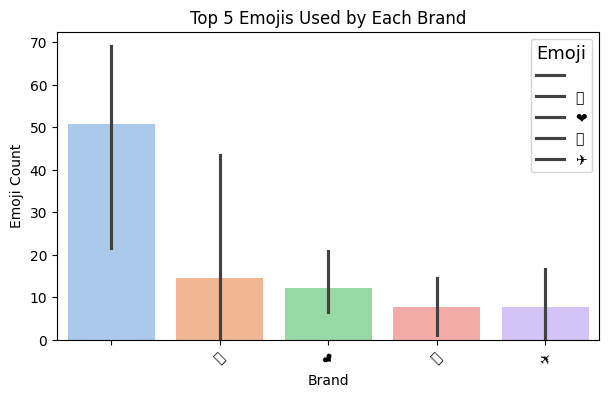

In [ ]:
# For visualization, let's select the top 5 most used emojis across all brands
top_emojis_overall = emoji_counts_df.sum(axis=1).nlargest(5).index

# Filter the DataFrame to include only these top emojis
filtered_emoji_counts_df = emoji_counts_df.loc[top_emojis_overall]

# Creating a bar plot for the top emojis used by each brand
plt.figure(figsize=(7, 4))
sns.barplot(data=filtered_emoji_counts_df.T, palette="pastel")
plt.title('Top 5 Emojis Used by Each Brand')
plt.xlabel('Brand')
plt.ylabel('Emoji Count')
plt.xticks(rotation=45)
plt.legend(title='Emoji', title_fontsize='13', loc='upper right', labels=filtered_emoji_counts_df.index)
plt.show()


### EMOTICONS

Create a list of emoticons that you're interested in analyzing.

In [ ]:
emoticons_list = [
    ":)", ":-)", ":]", ":-]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":っ)",
    ":(", ":-(", ":[", ":-[", ":{", ":-||", ":((", ":っC", ":'(", ":'-(", "QQ", "T.T", ";(",
    ";-)", ";)", "*-)", "*)", ";-]", ";]", ";^)", ":-,", ";D",
    "XD", "xD", "X-D", "x-D", "XD", "xD", "=D", "=3", "B^D",
    ":-*", ":*", ":x", "*-:", ":-*", ":^*", "💋",
    ":P", ":-P", ":p", ":-p", ":-Þ", ":Þ", ":-b", ":b",
    ":O", ":-O", ":o", ":-o", ">:O", ":-X", ":X", ":-#", ":#",
    ":'‑)", ":'‑]", ":'‑)", ":')",
    ":/", ":-/", ":.", ">:/", ":-.", ":\\", ":-\\", ":L", "=/", "=\\", ":S", ">.<",
    ">:]", ":-]", ":>", ":->", ">:(", ">:-(", ">:)", "(:<",
    "D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D-':",
    ">:P", "X-P", "x-p", ">:p", ":-p", "=p", ":‑Þ", ":‑þ", ":‑b", ":Þ", ":þ",
    "O:)", "0:3", "0:)", "0;^)",
    ">:)", ">:D", ">:-D", ">=D",
    "}:)", "}:-)", "3:)", "3:-)",
    "|;-)", "|-O",
    "#‑)", "%‑)", "%)",
    ":-&", ":&",
    "{:‑)", "{;‑)",
    ";‑###..", ">:‑###..",
    ",:-)", ",:-]",
    "^_^", "^-^", "^o^", "^O^", "（＾ｖ＾）", "（＾＿＾）", "(^_^)/", "(^.^)/", "(^-^)/", "（*＾＾*)", "（＾－＾）", "（＾-＾）", "＼(^o^)／", "＼（＾＿＾）／", "＼(^-^)／",
    "-_-", "-__-", "-___-",
    "¬_¬", "¬__¬", "¬___¬",
    "´_ゝ`", "ʕ•ᴥ•ʔ", "(｡♥‿♥｡)", "(♥_♥)", "ლ(╹◡╹ლ)", "(❁´◡`❁)", "(人◕ω◕)", "(✿◠‿◠)", "ʘ‿ʘ", "ಠ_ಠ", "ಠ‿ಠ", "ಠ⌣ಠ", "(ಠ‿ಠ)", "(ಠ⌣ಠ)", "(¬‿¬)", "(｡◕‿◕｡)", "(๑>ᴗ<๑)", "（*´▽｀*）", "(*≧ω≦)", "(─‿─)", "(•ω•)", "(•◡•)/", "(⊙ω⊙)", "(⊙ヮ⊙)", "（＾ｖ＾）"
]


In [ ]:
emoticons_list = [
    ":)", ":-)", ":]", ":-]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":っ)",
    ":(", ":-(", ":[", ":-[", ":{", ":-||", ":((", ":っC", ":'(", ":'-(", "QQ", "T.T", ";(",
    ";-)", ";)", "*-)", "*)", ";-]", ";]", ";^)", ":-,", ";D",
    "XD", "xD", "X-D", "x-D", "XD", "xD", "=D", "=3", "B^D",
    ":-*", ":*", ":x", "*-:", ":-*", ":^*", "💋",
    ":P", ":-P", ":p", ":-p", ":-Þ", ":Þ", ":-b", ":b",
    ":O", ":-O", ":o", ":-o", ">:O", ":-X", ":X", ":-#", ":#",
    ":'‑)", ":'‑]", ":'‑)", ":')",
    ":/", ":-/", ":.", ">:/", ":-.", ":\\", ":-\\", ":L", "=/", "=\\", ":S", ">.<",
    ">:]", ":-]", ":>", ":->", ">:(", ">:-(", ">:)", "(:<",
    "D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D-':",
    ">:P", "X-P", "x-p", ">:p", ":-p", "=p", ":‑Þ", ":‑þ", ":‑b", ":Þ", ":þ",
    "O:)", "0:3", "0:)", "0;^)",
    ">:)", ">:D", ">:-D", ">=D",
    "}:)", "}:-)", "3:)", "3:-)",
    "|;-)", "|-O",
    "#‑)", "%‑)", "%)",
    ":-&", ":&",
    "{:‑)", "{;‑)",
    ";‑###..", ">:‑###..",
    ",:-)", ",:-]",
    "^_^", "^-^", "^o^", "^O^", "（＾ｖ＾）", "（＾＿＾）", "(^_^)/", "(^.^)/", "(^-^)/", "（*＾＾*)", "（＾－＾）", "（＾-＾）", "＼(^o^)／", "＼（＾＿＾）／", "＼(^-^)／",
    "-_-", "-__-", "-___-",
    "¬_¬", "¬__¬", "¬___¬",
    "´_ゝ`", "ʕ•ᴥ•ʔ", "(｡♥‿♥｡)", "(♥_♥)", "ლ(╹◡╹ლ)", "(❁´◡`❁)", "(人◕ω◕)", "(✿◠‿◠)", "ʘ‿ʘ", "ಠ_ಠ", "ಠ‿ಠ", "ಠ⌣ಠ", "(ಠ‿ಠ)", "(ಠ⌣ಠ)", "(¬‿¬)", "(｡◕‿◕｡)", "(๑>ᴗ<๑)", "（*´▽｀*）", "(*≧ω≦)", "(─‿─)", "(•ω•)", "(•◡•)/", "(⊙ω⊙)", "(⊙ヮ⊙)", "（＾ｖ＾）"
]
import re

def extract_emoticons(text):
    found_emoticons = []
    for emoticon in emoticons_list:
        found_emoticons.extend(re.findall(re.escape(emoticon), text))
    return found_emoticons

tweets_data['emoticons_found'] = tweets_data['text'].apply(extract_emoticons)

emoticon_counts = {}
for brand in tweets_data['brand'].unique():
    brand_emoticons = sum(tweets_data[tweets_data['brand'] == brand]['emoticons_found'], [])
    emoticon_counts[brand] = Counter(brand_emoticons)

# Aggregate the counts of each emoticon across all brands
total_emoticon_counts = sum(emoticon_counts.values(), Counter())

# Creating a bar plot for the aggregated emoticon counts
plt.figure(figsize=(5, 3))
sns.barplot(x=list(total_emoticon_counts.keys()), y=list(total_emoticon_counts.values()), color = 'purple')
plt.title('Total Counts of Emoticon Occurrences Across All Brands')
plt.xlabel('Emoticon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

Write a function that searches for these emoticons in a given text and returns a list of found emoticons.

In [ ]:
import re

def extract_emoticons(text):
    found_emoticons = []
    for emoticon in emoticons_list:
        found_emoticons.extend(re.findall(re.escape(emoticon), text))
    return found_emoticons

Use this function to process each tweet in your dataset, counting the occurrences of each emoticon.

In [ ]:
tweets_data['emoticons_found'] = tweets_data['text'].apply(extract_emoticons)


Summarize the emoticon counts for each brand.

In [ ]:
emoticon_counts = {}
for brand in tweets_data['brand'].unique():
    brand_emoticons = sum(tweets_data[tweets_data['brand'] == brand]['emoticons_found'], [])
    emoticon_counts[brand] = Counter(brand_emoticons)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


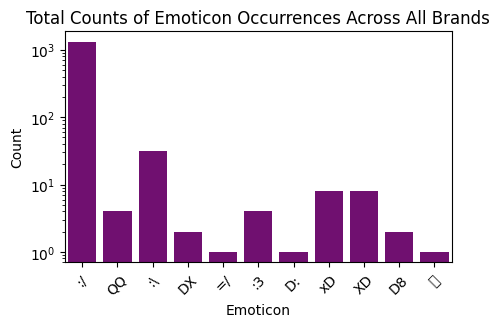

In [ ]:
# Aggregate the counts of each emoticon across all brands
total_emoticon_counts = sum(emoticon_counts.values(), Counter())

# Creating a bar plot for the aggregated emoticon counts
plt.figure(figsize=(5, 3))
sns.barplot(x=list(total_emoticon_counts.keys()), y=list(total_emoticon_counts.values()), color = 'purple')
plt.title('Total Counts of Emoticon Occurrences Across All Brands')
plt.xlabel('Emoticon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128139 (\N{KISS MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


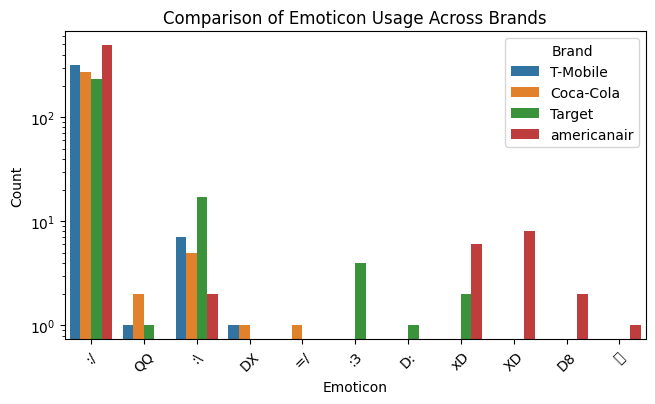

In [ ]:
# Convert the dictionary of Counter objects to a DataFrame
emoticon_counts_df = pd.DataFrame.from_dict(emoticon_counts, orient='index').fillna(0)

# Prepare data for grouped bar chart
emoticon_counts_melted = emoticon_counts_df.reset_index().melt(id_vars='index')
emoticon_counts_melted.columns = ['Brand', 'Emoticon', 'Count']

# Create a grouped bar chart
plt.figure(figsize=(7.5, 4))
sns.barplot(x='Emoticon', y='Count', hue='Brand', data=emoticon_counts_melted)
plt.title('Comparison of Emoticon Usage Across Brands')
plt.xlabel('Emoticon')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.yscale('log')
plt.show()

This plot illustrates the usage patterns of emoticons for each brand, allowing for a direct comparison between them.

## Point 3

In [ ]:
!pip install transformers

Let's classify the tweets into 'Informational' and 'Emotional' categories

In [ ]:
from transformers import pipeline

# Load a pre-trained model and tokenizer from Hugging Face
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Function to classify text
def classify_text(text):
    results = classifier(text)
    # Map model output to 'Informational' or 'Emotional' categories
    if results[0]['label'] == 'POSITIVE':
        return 'Emotional'
    else:
        return 'Informational'

# Apply the function to your text data
tweets_data['category'] = tweets_data['text'].apply(classify_text)

# Analyze the results
brand_categories = tweets_data.groupby(['brand', 'category']).size().unstack().fillna(0)

print(brand_categories)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

category     Emotional  Informational
brand                                
Coca-Cola          251            145
T-Mobile           229            271
Target             176            344
americanair        412            230


category     Emotional  Informational
brand                                
Coca-Cola     0.633838       0.366162
T-Mobile      0.458000       0.542000
Target        0.338462       0.661538
americanair   0.641745       0.358255


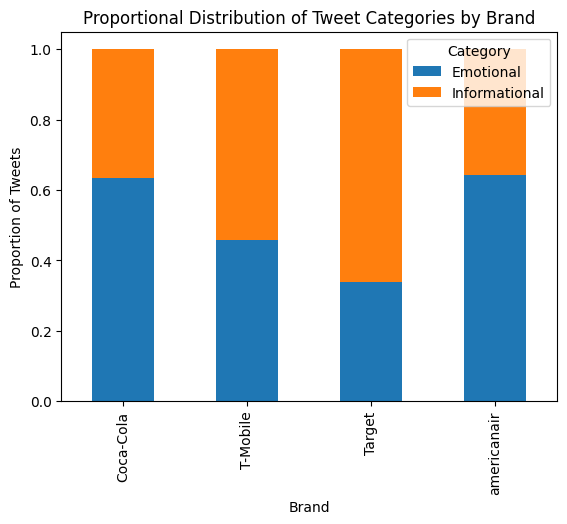

In [ ]:
# Assuming 'tweets_df' has a 'brand' column and a 'category' column from the earlier classification
category_counts = tweets_data.groupby('brand')['category'].value_counts(normalize=True).unstack().fillna(0)

# This will give you a DataFrame with the proportion of each category per brand
print(category_counts)

# For visualization
category_counts.plot(kind='bar', stacked=True)
plt.title('Proportional Distribution of Tweet Categories by Brand')
plt.xlabel('Brand')
plt.ylabel('Proportion of Tweets')
plt.legend(title='Category')
plt.show()


Each brand seems to have a mix of both 'Informational' and 'Emotional' tweets, with varying proportions.
- Coca-Cola: Appears to have a relatively balanced distribution between 'Informational' and 'Emotional' content. This might suggest a strategy that aims to provide information while also engaging emotionally with their audience, perhaps by associating their products with positive feelings and experiences.
- T-Mobile: Shows a similar pattern to Coca-Cola with a balance, but with a slightly higher proportion of 'Emotional' content. This could imply that T-Mobile is focusing on creating a brand image that resonates emotionally, perhaps aiming to connect with customers on a personal level beyond just providing service information.
- Target: The distribution here is again quite balanced but with a visible shift towards 'Informational' content. Target may be using Twitter to disseminate more information about products, offers, and in-store events, while still maintaining a significant level of emotional engagement with their audience.
- American Airlines: This brand has the greatest proportion of 'Informational' content among the depicted brands. This makes sense for an airline company, as customers often look for travel updates, safety information, and other travel-related news. The presence of 'Emotional' content, though less than the others, may be aimed at improving customer relationships and brand loyalty through more engaging, human-centered communication.


## Point 4

- Sentiment polarity and subjectivity of brands' tweets:

Sentiment polarity gives an idea of how positive or negative the content is. Brands with higher average polarity might focus on positive messaging to foster a favorable brand image. Subjectivity points to the personal opinion and emotional content within the tweets. Brands with higher subjectivity may be using social media to express opinions, evoke emotions, or engage in conversations that can foster a deeper connection with their audience.

- Emoji usage by brands in tweets:

The total number of emojis used by a brand in tweets can indicate how much they prioritize visual engagement. A brand using more emojis may aim for a more casual, approachable social media presence, while a brand using fewer emojis might lean towards a more traditional or formal tone.
Coca-Cola's use of 'hearts' could suggest an attempt to project a friendly and loving brand image. T-Mobile's use of communication-related emojis like 'mobile phone' signifies a focus on connectivity and service. Such targeted emoji usage could reflect marketing campaigns, brand values, or seasonal promotions.

- Emoticon usage by brands in tweets:

Each brand has a different tendency to use emoticons in their communication. The variety and frequency of emoticons used can reflect the tone and style of the brand's social media presence. Brands with a wider range of emoticons might aim for a more versatile and dynamic interaction with their audience. In contrast, brands that concentrate on a few specific emoticons may be aiming for a more consistent message or emotional response. Since we found a high count for specific emoticons such as smiles or frowns, this can indicate a general trend in how all the analyzed brands aim to resonate with their audience—perhaps striving for positivity or empathy.

- Tweet categories by brand (informational or emotional)

According to our findings each brand distributes its content between sharing information and creating an emotional connection. Coca-Cola and T-Mobile have a noticeable amount of 'Emotional' content, which may indicate a strategy that emphasizes brand personality and customer relationships. Target and American Airlines, while still having 'Emotional' content, lean more towards 'Informational', likely to maintain a professional brand image and provide customers with useful information.



In summary:
- Coca-Cola tends to balance 'Informational' and 'Emotional' content, possibly aiming to mix engagement with brand messaging.
- T-Mobile seems to favor emotional engagement, given the higher use of 'heart' emojis and 'Emotional' content classification.
- Target appears to be more informational, but with a good mix of emotional content, suggesting a strategy to inform and engage simultaneously.
- American Airlines shows a clear preference for informational content, likely due to the nature of the airline industry where updates and information are crucial.

# Part 2

### Data preparation

Let's look at data again

In [ ]:
tweets_data.head()

,id,created_at,text,likes,quotes,replies,retweets,brand,followers,following,polarity,subjectivity,emojis,emoji_count,emoticons_found,category
0,1,2020-01-01 00:10:14,The #TueYearsEve $20 gift card giveaway is off...,862,23,362,105,T-Mobile,1488892,12594,0.480000,0.470000,"[🤑, 📲]",2,"[:/, :/]",Informational
1,2,2019-12-31 21:00:04,"If you could have 2020 of something, it would be:",517,15,269,92,T-Mobile,1488892,12594,0.000000,0.000000,[],0,[],Informational
2,3,2019-12-31 20:00:00,"New year, new you, new $20 gift card🤑 \nReply ...",7502,2368,37780,3233,T-Mobile,1488892,12594,0.302273,0.440909,[🤑],1,[:/],Informational
3,4,2019-12-31 18:00:00,Start the new year off on the right… vacation ...,508,6,39,101,T-Mobile,1488892,12594,0.068182,0.227273,"[🧳, 💯, 📲]",3,"[:/, :/]",Informational
4,5,2019-12-31 11:00:00,New York drops the ball. We drop money 🤑\n\nKi...,6838,218,1225,2129,T-Mobile,1488892,12594,0.312121,0.284848,"[🤑, 🎉]",2,[:/],Informational


Create a new column 'category_dummy' where 'Emotional' is 1 and 'Informational' is 0

In [ ]:
tweets_data['category_dummy'] = tweets_data['category'].apply(lambda x: 1 if x == 'Emotional' else 0)

# Now 'tweets_df' will have a new column with dummy variables for the 'category'

Create a new column 'emoticon_count' giving you the number of emoticons found in the tweet

In [ ]:
tweets_data['emoticon_count'] = tweets_data['emoticons_found'].apply(len)

Drop unneccesary columns for regression

In [ ]:
tweets_data_new = tweets_data.drop(['id','created_at', 'brand', 'text', 'emojis', 'emoticons_found', 'category'], axis = 1)

In [ ]:
tweets_data_new.head()

,likes,quotes,replies,retweets,followers,following,polarity,subjectivity,emoji_count,category_dummy,emoticon_count
0,862,23,362,105,1488892,12594,0.480000,0.470000,2,0,2
1,517,15,269,92,1488892,12594,0.000000,0.000000,0,0,0
2,7502,2368,37780,3233,1488892,12594,0.302273,0.440909,1,0,1
3,508,6,39,101,1488892,12594,0.068182,0.227273,3,0,2
4,6838,218,1225,2129,1488892,12594,0.312121,0.284848,2,0,1


## Point 5

### Model 1: Multiple Linear Regression predicting the number of likes

Interaction terms allow you to explore whether the effect of one predictor variable on the dependent variable depends on the level of another predictor variable. Based on typical social media dynamics we decided to deploy the following interaction terms, each one with an explanation for its deployment:

1.  Emoticons and sentiment: an interaction term between emoticon_count and polarity could capture if emoticons enhance the sentiment of a tweet, thus affecting likes more when combined than separately.

2.  Subjectivity and sentiment: the combination of subjectivity and polarity could be interesting. Highly subjective and positive tweets might engage users differently than objective and positive ones.

3.  Replies and polarity: if negative sentiment (polarity) leads to more replies, this might indicate controversy, which could affect likes. An interaction between replies and polarity could capture this.

4.  Followers and retweets: more followers could amplify the effect of retweets on likes, as there is a larger base of potential likers. The interaction term followers * retweets could capture this synergistic effect.

In [ ]:
# Creating interaction terms
tweets_data_new['emoticon_polarity_interaction'] = tweets_data_new['emoticon_count'] * tweets_data_new['polarity']
tweets_data_new['subjectivity_polarity_interaction'] = tweets_data_new['subjectivity'] * tweets_data_new['polarity']
tweets_data_new['replies_polarity_interaction'] = tweets_data_new['replies'] * tweets_data_new['polarity']
tweets_data_new['followers_retweets_interaction'] = tweets_data_new['followers'] * tweets_data_new['retweets']

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

target = 'likes'
train_size = 0.8
random_state = 42
X = tweets_data_new.drop(target, axis=1)  # Add all predictors
y = tweets_data_new[target]  # This could be likes, retweets, etc.

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

# Build the model
model_likes = sm.OLS(y_train, X_train).fit()

# View the model summary
print(model_likes.summary())


                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     963.4
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:55:22   Log-Likelihood:                -14380.
No. Observations:                1646   AIC:                         2.879e+04
Df Residuals:                    1631   BIC:                         2.887e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

Model's fit:
- R-squared (0.892): This value is quite high, indicating that the model explains a large portion of the variance in the number of likes on tweets. Such a high R-squared value is promising as it suggests the model fits the data well.
- It is worth noting how the R squared increased from around 0.4 to almost 0.9 after the addition of interaction terms
- Adjusted R-squared (0.891): This is also high and very close to the R-squared value, which indicates that the number of predictors is appropriate and the model is not being penalized for unnecessary complexity.
- The F-statistic is significant, suggesting that the overall model is a better fit than an intercept-only model.

Significant variables:
- 'quotes', 'retweets', and 'followers_retweets_interaction' are statistically significant and positively associated with the number of likes. This implies that tweets with more quotes and retweets, and those that have an interaction between followers and retweets, tend to get more likes.
- 'retweets' have a negative coefficient, which is counterintuitive as one would expect more retweets to correlate with more likes. However, since the interaction term with followers is significant and positive, it may suggest that the effect of retweets on likes is moderated by the number of followers.
- 'following' has a significant negative association, suggesting that accounts following more users tend to get fewer likes on their tweets.
- 'polarity' is not significant, which means that sentiment polarity alone may not have a straightforward impact on the number of likes.
- 'emoji_count' is also significant and positively associated with likes, indicating that tweets with more emojis tend to receive more likes.

### Model 2: Multiple Linear Regression predicting number of replies

- Sentiment and subjectivity: an interaction between sentiment (polarity) and subjectivity could capture the combined effect of emotional content and personal opinion, which may provoke more discussion and replies.

- Followers and tweet content type: If you have a variable indicating the type of content (e.g., video, image, text), the interaction between the number of followers and content type could be insightful, as certain content types might generate more discussion among a larger audience.

- Retweets and polarity: This interaction can help understand if more retweets of a particular sentiment tend to generate more replies, suggesting a viral effect that prompts conversations.

- Emoticon and emoji count: the presence of emoticons and emojis could make tweets appear more casual and approachable, potentially encouraging more replies. An interaction term between these counts could reveal if their combined presence has a multiplicative effect on engagement.

- Quotes and followers: tweets that contain quotes might be part of a conversation or a controversial topic that invites discussion, especially among a user's followers.


In [ ]:
tweets_data_new['sentiment_subjectivity_interaction'] = tweets_data_new['polarity'] * tweets_data_new['subjectivity']
tweets_data_new['followers_category_interaction'] = tweets_data_new['followers'] * tweets_data_new['category_dummy']  # Assuming you have a dummy variable for content type
tweets_data_new['retweets_polarity_interaction'] = tweets_data_new['retweets'] * tweets_data_new['polarity']
tweets_data_new['emoticon_emoji_interaction'] = tweets_data_new['emoticon_count'] * tweets_data_new['emoji_count']
tweets_data_new['quotes_followers_interaction'] = tweets_data_new['quotes'] * tweets_data_new['followers']

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

target = 'replies'
train_size = 0.8
random_state = 42
X = tweets_data_new.drop(target, axis=1)  # Add all predictors
y = tweets_data_new[target]  # This could be likes, retweets, etc.

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=random_state)

# Build the model
model = sm.OLS(y_train, X_train).fit()

# View the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                replies   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     445.1
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        08:55:22   Log-Likelihood:                -12344.
No. Observations:                1646   AIC:                         2.473e+04
Df Residuals:                    1627   BIC:                         2.483e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Model's fit:
- R-squared (0.831): This is a strong R-squared value, suggesting that about 83.1% of the variability in the number of replies is explained by the model. This indicates a good fit.
- Adjusted R-squared (0.829): Adjusted for the number of predictors, this value remains high, which suggests that the inclusion of additional predictors (including interaction terms) is appropriate and contributing to the model.
- The F-statistic is significant, which indicates that the model provides a better fit than an intercept-only model.

Significant varibales:
- 'retweets' is significant and positively associated with the number of replies, which aligns with the expectation that tweets that are retweeted more often may engage the audience to a greater extent.
- 'polarity' shows a negative coefficient and is significant, indicating that tweets with more negative sentiment tend to receive more replies, potentially suggesting that they may invoke more conversation or debate.
- 'subjectivity' has a significant positive relationship with the number of replies, suggesting that more opinionated or emotional tweets tend to generate more engagement in the form of replies.
- Most of the interaction terms are not statistically significant, but emoticon_polarity_interaction is significant and positive, suggesting that the combination of emoticons and the sentiment expressed in a tweet could amplify the number of replies.
- 'followers_retweets_interaction' is also significant and negative, suggesting that for accounts with more followers, the effect of retweets on the number of replies may be different compared to those with fewer followers.

## Point 6

### Point 6a and 6b

#### Interpretation and marketing implications for Model 1 (likes)

Based on the regression model that predicted the number of likes, we were able to draw several key insights and marketing implications.

1. **Quotes and likes**:
   - **Insight**: the model suggests that tweets containing quotes are more likely to be liked.
   - **Marketing implication**: marketers should incorporate relevant and impactful quotes into their tweets. This can include customer testimonials, industry insights, or popular cultural references that resonate with the audience, driving them to 'like' the content as a form of agreement or endorsement.

2. **Retweets and likes**:
   - **Insight**: an unexpected negative coefficient for `retweets` indicates that tweets with more retweets do not necessarily receive more likes.
   - **Marketing implication**: it's essential for marketers to differentiate between content that is 'likeable' versus content that is 'shareable'. They might conduct content audits to understand what makes content shareable and adjust their strategies to also create content that encourages likes, such as positive, affirming messages.

3. **Negative sentiment**:
   - **Insight**: Negative sentiment polarity is associated with fewer likes, suggesting that users prefer to 'like' tweets with positive sentiment.
   - **Marketing implication**: This highlights the importance of maintaining a positive tone in tweets. Marketers should aim to associate their brand with positivity, perhaps by highlighting positive stories, customer successes, or by offering constructive and uplifting messages.

4. **Followers and following**:
   - **Insight**: the number of followers and accounts followed by a brand has a negative association with likes.
   - **Marketing implication**: this suggests that audience size doesn't guarantee engagement. Marketers should focus on nurturing the existing follower base with targeted content and building relationships rather than just increasing follower count. Quality engagement strategies could include engaging directly with followers, personalizing content, and building community.

5. **Emojis and likes**:
   - **Insight**: emojis are significantly positively related to likes.
   - **Marketing implication**: emojis can make content more engaging and relatable. Brands should thoughtfully include emojis that complement the message, making tweets more visually appealing and emotionally expressive, which can increase the propensity for users to 'like' the tweet.

6. **Emoticons and sentiment interaction**:
   - **Insight**: there is a significant interaction between emoticons and sentiment polarity.
   - **Marketing implication**: the combined use of emoticons and sentiment can impact likes. Marketers should consider the context and the sentiment of the message when using emoticons. For instance, a smiley face in a positive tweet can reinforce the sentiment and may make the tweet more 'likeable'.


#### Interpretation and marketing implications for Model 2 (replies)

From the regression model predicting replies were able to draw several insights that have direct marketing implications:

1. **Emoticons and sentiment influence**: the positive coefficient for the `emoticon_polarity_interaction` indicates that emoticons can amplify the sentiment of a tweet in terms of generating replies. From a marketing perspective, this suggests that carefully pairing emoticons with the message's tone can increase engagement. Marketers could craft tweets that combine sentiment and emoticons to encourage conversation and make posts more relatable and humanized.

2. **Negative sentiment drives engagement**: The negative sentiment polarity being significant and negatively associated with the number of replies suggests that tweets with a negative tone or those discussing potentially controversial topics tend to provoke more responses. For marketers, this implies that not all engagement is positive; however, these replies may represent an opportunity to address concerns, provide customer service, or engage in a dialogue that could improve brand perception.

3. **Subjectivity attracts replies**: since subjectivity is positively related to replies, tweets that express opinions or emotions might encourage more audience interaction. This could be used in marketing strategies to create more personalized and opinion-driven content that resonates with the audience, potentially leading to greater brand loyalty.

4. **Impact of followers and retweets interaction**: The negative coefficient for `followers_retweets_interaction` suggests that for brands with a larger follower base, increases in retweets do not translate as effectively into more replies as they might for smaller brands. Marketers at larger brands might need to focus on other strategies beyond simply amplifying reach to encourage replies and engage their audience.

5. **Retweets**: Given the positive coefficient for retweets, this metric continues to be a straightforward indicator of visibility and engagement. Marketers should continue to produce content that is likely to be shared widely.



### Point 6c

In [ ]:
tweets_data_brand = tweets_data.drop(['id','created_at', 'text', 'emojis', 'emoticons_found', 'category'], axis = 1)

In [ ]:
# Creating interaction terms
tweets_data_brand['emoticon_polarity_interaction'] = tweets_data_brand['emoticon_count'] * tweets_data_brand['polarity']
tweets_data_brand['subjectivity_polarity_interaction'] = tweets_data_brand['subjectivity'] * tweets_data_brand['polarity']
tweets_data_brand['replies_polarity_interaction'] = tweets_data_brand['replies'] * tweets_data_brand['polarity']
tweets_data_brand['followers_retweets_interaction'] = tweets_data_brand['followers'] * tweets_data_brand['retweets']

In [ ]:
# Create dummy variables manually for the 'brand' column
brand_dummies = pd.get_dummies(tweets_data_brand['brand'], prefix='brand')
# Drop brand column
tweets_data_brand = tweets_data_brand.drop('brand', axis=1)

# Select a reference category manually and drop it from the dummies
# Let's say 'Coca-Cola' is the reference brand, so we drop its dummy variable
brand_dummies = brand_dummies.drop(['brand_Coca-Cola'], axis=1)

# Now, let's interact 'polarity' with each brand dummy
for brand in brand_dummies:
    tweets_data_brand[f'polarity_{brand}'] = tweets_data_brand['polarity'] * brand_dummies[brand]

# Your predictors X now should include these dummy variables
# Assuming 'X' already includes your other predictors
target = 'likes'
X_brand_likes = tweets_data_brand.drop(target, axis = 1)
X_brand_likes = pd.concat([X_brand_likes, tweets_data_brand.filter(like='polarity_brand')], axis=1)  # Add interaction terms
y_brand_likes = tweets_data_brand[target]

# Adding a constant for the intercept
X_brand = sm.add_constant(X_brand_likes)

model_brand_likes = sm.OLS(y_brand_likes, X_brand_likes).fit()

# Display the results
print(model_brand_likes.summary())


                                 OLS Regression Results                                
Dep. Variable:                  likes   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              1003.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):                        0.00
Time:                        08:55:22   Log-Likelihood:                         -18132.
No. Observations:                2058   AIC:                                  3.630e+04
Df Residuals:                    2041   BIC:                                  3.639e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

How did we analyse cross-brand differences?

To include 'brand' as a categorical predictor in the regression model, dummy variables were created for each level of the 'brand' variable except for one, which serves as the reference category. In this case, Coca-Cola was chosen as the reference brand since its dummy variable is not present in the regression output. In our case, having four brands (Coca-Cola, T-Mobile, Target, and American Airlines), we created three dummy variables (one for each brand except Coca-Cola). Each tweet is marked with a 1 for its respective brand dummy variable and 0 for the others. In the regression model, the coefficients for these dummies represent the difference in the expected number of likes for tweets from T-Mobile, Target, and American Airlines as compared to Coca-Cola.

On top of that, we decided to create interaction variables between polarity and the different brands. The coefficients for the interaction terms between 'polarity' and the brand dummy variables (e.g., polarity_brand_T-Mobile) show the additional effect of polarity on likes for each brand relative to the reference brand (Coca-Cola).

- 'polarity_brand_T-Mobile': The positive coefficient indicates that for T-Mobile, the effect of sentiment polarity on the number of likes is more substantial compared to Coca-Cola. A more positive sentiment could lead to a larger increase in likes for T-Mobile than for Coca-Cola.

- 'polarity_brand_Target': Similarly, the positive coefficient for Target suggests that positive sentiment polarity also has a stronger impact on likes for Target compared to Coca-Cola.

- 'polarity_brand_Americanair': The same interpretation applies to American Airlines; positive sentiment polarity on tweets results in a greater number of likes compared to Coca-Cola.

T-Mobile, Target, American Airlines: For these brands, maintaining a positive sentiment in tweets may be even more crucial than for Coca-Cola. Marketing campaigns and social media strategies should focus on crafting content with positive messaging. Coca-Cola's strategy could be focused on other aspects of the brand or on messaging that does not rely as heavily on sentiment for engagement.

### Point 6d

We can clearly see that there are some elements that have an impact on likes outcome while having no/or little effect the replies outcome:

**Elements impacting likes but not replies:**
- Emoji Count: Positively impacts the number of likes a tweet receives, suggesting visual appeal boosts likability. However, it doesn't have the same effect on generating replies.

**Elements impacting replies but not likes:**
- Subjectivity: Positively influences the number of replies, indicating that personal or emotional content invites conversation. This element doesn't significantly affect likes.
- Emoticon polarity interaction: Shows a significant relationship with replies, suggesting that the combination of sentiment and emoticon use prompts users to respond. This interaction does not significantly affect likes.

These differences highlight how distinct elements of tweet content can encourage specific types of engagement, with emojis making tweets more likable, while subjectivity and emoticons combined with sentiment seem to invite more replies. In contrast, retweets and quotes appear to stimulate likes more than they do conversations.

## Point 7

At the end of the extensive analysis that we carried out in this assignement, we were able to draft the following strategic marketing communication takaways for these brand-companies:

1.  Emojis significantly increase the likelihood of a tweet being liked. Incorporate them strategically to enhance the visual appeal and emotional connection of your tweets.

2.  Tweets that express opinions or emotions are more likely to receive replies. Craft messages that invite discussion to foster community engagement.

3.   Including relatable or impactful quotes in tweets can boost likes. Use memorable phrases or soundbites that align with brand messaging and resonate with the audience.

4. Recognize that the impact of sentiment on engagement varies by brand; tailor content to reflect brand-specific audience preferences, using sentiment analysis to guide the tone of communication.

5. Retweets may not directly translate into likes and can have an inverse relationship; focus on creating content that is not only shareable but also encourages positive engagement in the form of likes.